In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [2]:
# Sample settings
num_samples = 1000 # Number of Samples to use for dataset
val_ratio = 0.2    # Percentage of samples used for validation
test_ratio = 0.1   # Percentage of samples used for testing
model_name = 'chirp_model'
tflite_model_name = 'chirp_model' # .tflite suffix
c_model_name = 'chirp_model' # .h suffix

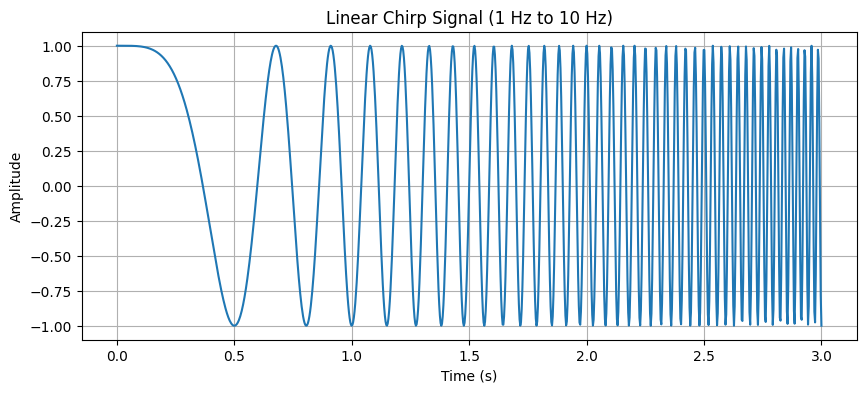

In [7]:
f0 = 1
f1 = 10
T = 3
t = np.linspace(0, T, num_samples)
k = (f1 - f0)/T
chirp_signal = np.cos(2*np.pi*((f0*t) + k/2)*(t**2))


plt.figure(figsize=(10, 4))
plt.plot(t, chirp_signal)
plt.title("Linear Chirp Signal (1 Hz to 10 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

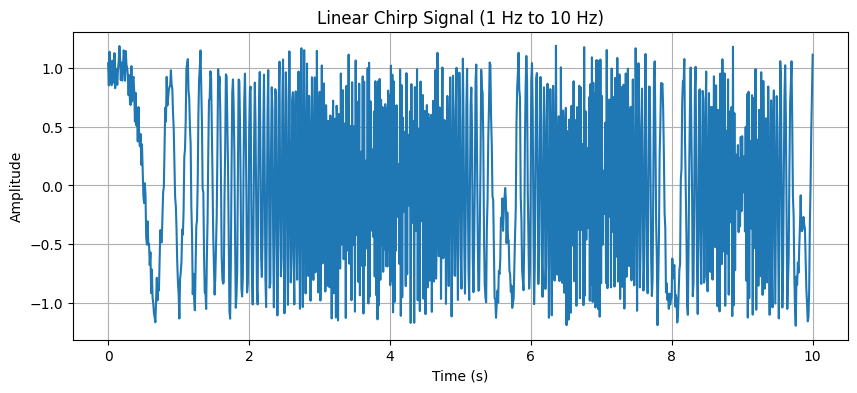

In [4]:
# Add noise
noise = np.random.uniform(-0.2, 0.2, num_samples)
chirp_signal_noisy = chirp_signal + noise

plt.figure(figsize=(10, 4))
plt.plot(t, chirp_signal_noisy)
plt.title("Linear Chirp Signal (1 Hz to 10 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()



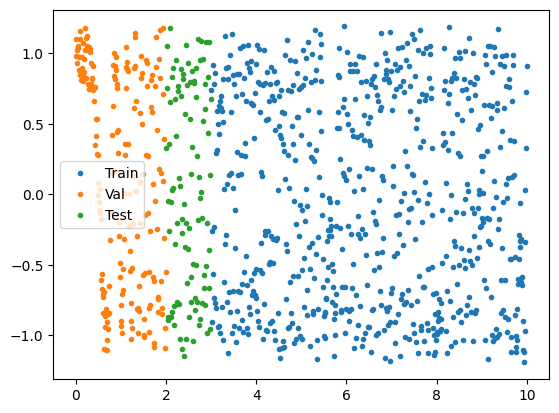

In [29]:
# Split the dataset into training, validation and test sets
val_split = int(val_ratio * num_samples)
test_split = int(val_split + (test_ratio * num_samples))
x_val, x_test, x_train = np.split(t, [val_split, test_split])
y_val, y_test, y_train = np.split(chirp_signal_noisy, [val_split, test_split])

#Check that our splits add up
assert(num_samples == (x_train.size + x_val.size + x_test.size))

#Plot the data in each partition in different colors
plt.plot(x_train, y_train, '.', label = 'Train')
plt.plot(x_val, y_val, '.', label = 'Val')
plt.plot(x_test, y_test, '.', label = 'Test')
plt.legend()
plt.show()


In [ ]:
# Create a model - 2 layers of 16 nodes each, final node gives prediction
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# View the Model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Optimizer, loss function, metrics to model and compile it
model.compile(optimizer = 'rmsprop', loss = 'mae', metrics = ['mae'])

In [ ]:
#Train model
history = model.fit(x_train, y_train, epochs = 200, batch_size = 16, validation_data = (x_val, y_val))

Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.0981 - mae: 1.0981 - val_loss: 0.8521 - val_mae: 0.8521
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7666 - mae: 0.7666 - val_loss: 0.6769 - val_mae: 0.6769
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6523 - mae: 0.6523 - val_loss: 0.5655 - val_mae: 0.5655
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5793 - mae: 0.5793 - val_loss: 0.5260 - val_mae: 0.5260
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5355 - mae: 0.5355 - val_loss: 0.4962 - val_mae: 0.4962
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5037 - mae: 0.5037 - val_loss: 0.4744 - val_mae: 0.4744
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4624 - mae: 0.4624 - val_loss: 0.4507 - val_mae: 0.4507
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4596 - mae: 0.4596 - val_loss: 0.4257 - val_mae: 0.4257
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.41

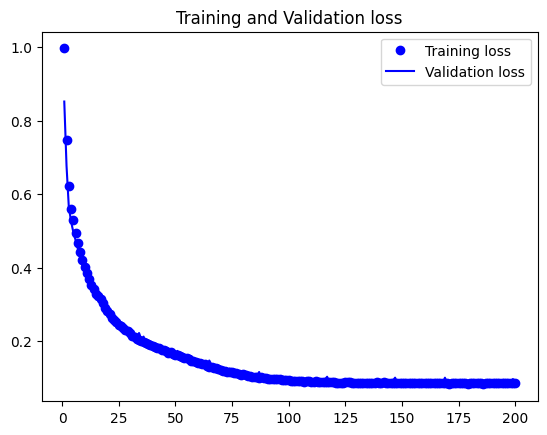

In [ ]:
# Plot the history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


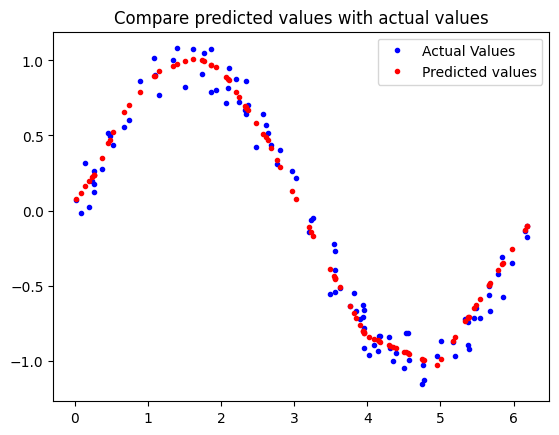

In [ ]:
# Plot Predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Compare predicted values with actual values")
plt.plot(x_test, y_test, 'b.', label = 'Actual Values')
plt.plot(x_test, predictions, 'r.', label = 'Predicted values')
plt.legend()
plt.show()


In [ ]:
model.predict(np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[ 0.07247502],
       [ 0.84729654],
       [ 0.93175906],
       [ 0.09518734],
       [-0.83567816],
       [-0.9964647 ],
       [-0.2405678 ]], dtype=float32)

In [ ]:
model.save(model_name + '.h5')

In [ ]:
# Convert to lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)


Saved artifact at '/tmp/tmpp8uzfuzn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137072649326416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137072649326992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137072649327760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137072649333136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137072649331984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137072649333712: TensorSpec(shape=(), dtype=tf.resource, name=None)


3164

In [ ]:
# Convert to C code - Source : Shawyn Hymel TinyML series
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [ ]:
# write TFLite model to C source
with open(model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))